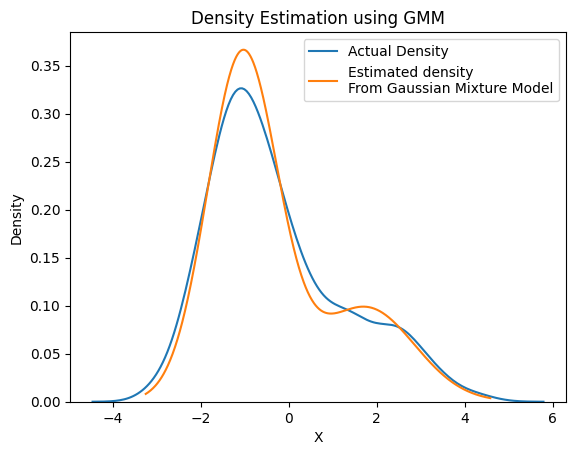

In [ ]:
#Expectation maximisation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
import seaborn as sns

mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 0.8
X1 = np.random.normal(mu1, sigma1, size=200)
X2 = np.random.normal(mu2, sigma2, size=600)
X = np.concatenate([X1, X2])
X = X.reshape(-1, 1)
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)

x_grid = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
density_estimation = np.exp(gmm.score_samples(x_grid))x
sns.kdeplot(X, label = "Actual Density")
plt.plot(x_grid, density_estimation, label='Estimated density\nFrom Gaussian Mixture Model')
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimation using GMM')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


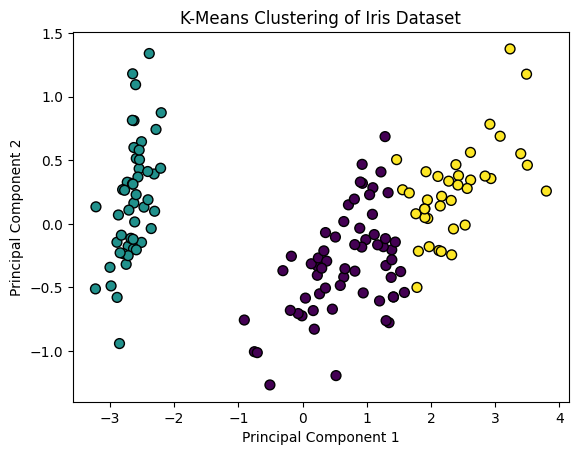

In [ ]:
#kmeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot to visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#random forest
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier_1 = RandomForestClassifier(n_estimators=9, random_state=42)
rf_classifier_2 = RandomForestClassifier(n_estimators=1, random_state=7)
rf_classifier_3 = RandomForestClassifier(n_estimators=8, random_state=0)

rf_classifier_1.fit(X_train, y_train)
rf_classifier_2.fit(X_train, y_train)
rf_classifier_3.fit(X_train, y_train)

predictions_1 = rf_classifier_1.predict(X_train)
predictions_2 = rf_classifier_2.predict(X_train)
predictions_3 = rf_classifier_3.predict(X_train)

accuracy_1 = accuracy_score(y_train, predictions_1)
accuracy_2 = accuracy_score(y_train, predictions_2)
accuracy_3 = accuracy_score(y_train, predictions_3)

ensemble_accuracy = mode([accuracy_1, accuracy_2, accuracy_3], axis=0)

print(f'Ensemble Accuracy 1: {accuracy_1}')
print(f'Ensemble Accuracy 2: {accuracy_2}')
print(f'Ensemble Accuracy 3: {accuracy_3}')
print(f'Ensemble Accuracy : {ensemble_accuracy}')

Ensemble Accuracy 1: 1.0
Ensemble Accuracy 2: 0.9333333333333333
Ensemble Accuracy 3: 1.0
Ensemble Accuracy : ModeResult(mode=1.0, count=2)


In [ ]:
#Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

data = {'Feature1': [1, 2, 2, 1, 3, 3, 1, 2, 3, 3],
        'Feature2': ['A', 'B', 'B', 'A', 'C', 'C', 'A', 'B', 'C', 'C'],
        'Class': [0, 1, 1, 0, 1, 1, 0, 1, 1, 0]}

df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['Feature2'])

X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

nb_classifier = CategoricalNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
#Apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

transactions = [['Milk', 'Bread', 'Butter'],
                ['Milk', 'Bread'],
                ['Milk', 'Diapers'],
                ['Milk', 'Beer', 'Diapers'],
                ['Bread', 'Butter'],
                ['Bread', 'Beer'],
                ['Butter', 'Diapers'],
                ['Bread', 'Beer', 'Diapers']]

encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
df = pd.DataFrame(onehot, columns=encoder.columns_)

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("Association Rules:")
print(rules)

Frequent Itemsets:
    support                itemsets
0     0.375                  (Beer)
1     0.625                 (Bread)
2     0.375                (Butter)
3     0.500               (Diapers)
4     0.500                  (Milk)
5     0.250           (Bread, Beer)
6     0.250         (Beer, Diapers)
7     0.125            (Beer, Milk)
8     0.250         (Butter, Bread)
9     0.125        (Bread, Diapers)
10    0.250           (Bread, Milk)
11    0.125       (Butter, Diapers)
12    0.125          (Butter, Milk)
13    0.250         (Milk, Diapers)
14    0.125  (Bread, Beer, Diapers)
15    0.125   (Milk, Beer, Diapers)
16    0.125   (Butter, Bread, Milk)
Association Rules:
        antecedents consequents  antecedent support  consequent support  \
0  (Bread, Diapers)      (Beer)               0.125               0.375   
1      (Beer, Milk)   (Diapers)               0.125               0.500   
2    (Butter, Milk)     (Bread)               0.125               0.625   

   support  c

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Explained Variance Ratio:
[1.00000000e+00 1.31476818e-32]
Principal Components: [[ 2.45e+00,  3.44e-16],
 [ 1.22e+00, -1.15e-16],
 [-0.00e+00, -0.00e+00],
 [-1.22e+00,  1.15e-16],
 [-2.45e+00,  2.29e-16]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


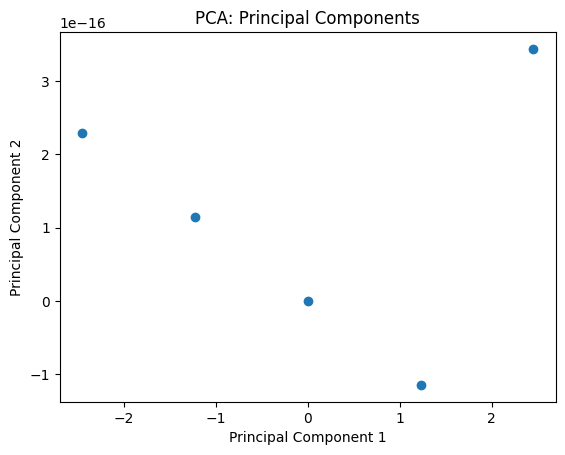

In [ ]:
#PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [5, 4, 3, 2, 1],
    'Feature3': [2, 3, 4, 5, 6]
}

df = pd.DataFrame(data)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

formatted_principal_components = np.array2string(principal_components, precision=2, separator=', ')
print("Principal Components:", formatted_principal_components)

plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('PCA: Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from abc import ABC, abstractmethod

# Single Responsibility Principle (SRP)
class Room:
    def __init__(self, room_number, capacity, price_per_night):
        self.room_number = room_number
        self.capacity = capacity
        self.price_per_night = price_per_night


class RoomRepository:
    def __init__(self):
        self.occupied = []

    def save_room(self, room):
        # Code to save room details to a database
        # For demonstration, let's assume we are just updating the 'occupied' list
        self.occupied.append(room.room_number)
        print(f"Room {room.room_number} marked as occupied.")

    def get_occupied_rooms(self):
        return self.occupied


class Booking:
    def __init__(self, room,days, guest_name):
        self.room = room
        self.days=days
        self.guest_name = guest_name


# Open/Closed Principle (OCP)
class DiscountStrategy(ABC):
    @abstractmethod
    def apply_discount(self, total_price):
        pass


class NoDiscount(DiscountStrategy):
    def apply_discount(self, total_price):
        return total_price


class PercentageDiscount(DiscountStrategy):
    def __init__(self, discount_percentage):
        self.discount_percentage = discount_percentage

    def apply_discount(self, total_price):
        return total_price - (total_price * self.discount_percentage / 100)


# Liskov Substitution Principle (LSP)
class Suite(Room):
    def __init__(self, room_number, capacity, price_per_night, extra_amenities):
        super().__init__(room_number, capacity, price_per_night)
        self.extra_amenities = extra_amenities


# Interface Segregation Principle (ISP)
class RoomInfo(ABC):
    @abstractmethod
    def get_room_details(self):
        pass


class RoomManagement(ABC):
    @abstractmethod
    def add_room(self, room):
        pass


class RoomDetails(RoomInfo):
    def __init__(self, room):
        self.room = room

    def get_room_details(self):
        return f"Room {self.room.room_number}, Capacity: {self.room.capacity}, Price per Night: ${self.room.price_per_night}"


class RoomInventory(RoomManagement):
    def __init__(self):
        self.rooms = []

    def add_room(self, room):
        self.rooms.append(room)


# Dependency Inversion Principle (DIP)
class BookingProcessor:
    def __init__(self, discount_strategy):
        self.discount_strategy = discount_strategy

    def process_booking(self, booking):
        total_price = booking.days * booking.room.price_per_night
        discounted_price = self.discount_strategy.apply_discount(total_price)
        # Code to process the booking


# Example Usage
if __name__ == "__main__":
    standard_room = Room(101, 2, 80.0)
    suite_room = Suite(201, 4, 150.0, ["Jacuzzi", "Minibar"])

    room_repository = RoomRepository()
    room_repository.save_room(standard_room)
    room_repository.save_room(suite_room)

    booking = Booking(standard_room,days=4, guest_name="John Doe")
    booking = Booking(suite_room,days=4, guest_name="John Doe")

    no_discount_strategy = NoDiscount()
    percentage_discount_strategy = PercentageDiscount(15)

    booking_processor_no_discount = BookingProcessor(no_discount_strategy)
    booking_processor_percentage_discount = BookingProcessor(percentage_discount_strategy)

    booking_processor_no_discount.process_booking(booking)
    booking_processor_percentage_discount.process_booking(booking)

    room_inventory = RoomInventory()
    room_inventory.add_room(standard_room)
    room_inventory.add_room(suite_room)

    room_details = RoomDetails(standard_room)
    print(room_details.get_room_details())
    room_details = RoomDetails(suite_room)
    print(room_details.get_room_details())
    print("Occupied Rooms:", room_repository.get_occupied_rooms())

Room 101 marked as occupied.
Room 201 marked as occupied.
Room 101, Capacity: 2, Price per Night: $80.0
Room 201, Capacity: 4, Price per Night: $150.0
Occupied Rooms: [101, 201]
